# Exploratory Data Analysis - Customer Loans in Finance


In [1]:
from dat_tran import DataTransform
from db_utils import RDSDatabaseConnector
from dat_frame_inf import DataFrameInfo
from dataframe_tran import DataFrameTransform
from matplotlib import pyplot

from plotter import Plotter
from tabulate import tabulate
from scipy.stats import normaltest
from scipy import stats

from statsmodels.graphics.gofplots import qqplot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import statistics as st







## Retreive data
Download data from AWS or retieve from local drive and open as a data frame.

In [2]:
up_ld = RDSDatabaseConnector("loan_payments")

In [3]:
#df_tran = up_ld.download_db_table("credentials.yaml", "loan_payments")

In [4]:
df_tran = up_ld.csv_load("loan_payments")

our df
         id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date last_payment_amount  \
0                     0.0           Jan-2022              248.82 

## Check and convert columns to correct formats

In [5]:
cc_cols = DataTransform()

init_


### Visualise colmn data types

In [6]:
# Data types of all columns
df_tran.dtypes
#print(f'{type(df_tran)}')

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

#### Change mixed columns to dates

In [7]:
cc_cols.pd_object_to_date(df_tran, ["issue_date", "last_payment_date", "next_payment_date", "last_credit_pull_date", "earliest_credit_line"])

/home/simon/Documents/python_projects/Exploratory-Data-Analysis---Customer-Loans-in-Finance/dat_tran.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  curr_df[c_col] = pd.to_datetime(curr_df[c_col], errors='coerce').dt.strftime('%Y-%m')
/home/simon/Documents/python_projects/Exploratory-Data-Analysis---Customer-Loans-in-Finance/dat_tran.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  curr_df[c_col] = pd.to_datetime(curr_df[c_col], errors='coerce').dt.strftime('%Y-%m')
/home/simon/Documents/python_projects/Exploratory-Data-Analysis---Customer-Loans-in-Finance/dat_tran.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is c

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.00,0.00,2022-01,248.82,2022-02,2022-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.00,0.00,2022-01,407.52,2022-02,2022-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.00,0.00,2021-10,12850.16,NaN,2021-10,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.00,0.00,2021-06,13899.67,NaN,2021-06,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.00,0.00,2022-01,456.54,2022-02,2022-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,0.00,0.00,2016-07,160.61,NaN,2016-07,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,0.00,0.00,2016-10,490.01,NaN,2016-09,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,0.00,0.00,2016-09,110.58,2016-09,2013-05,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,0.00,0.00,2014-03,0.00,NaN,2013-05,NaN,NaN,1,INDIVIDUAL


#### Change mixed columns to floats

In [8]:
# not sure if this should be in a later stage or term shoild be in here 
cc_cols.unwanted_char_removal_int(df_tran, ["term", "employment_length"] )
cc_cols.mixed_col_to_num(df_tran, ["term", "employment_length"])
pd.options.display.max_columns = None
df_tran.head()


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,5.0,MORTGAGE,46000.0,Not Verified,2021-01,Current,n,credit_card,19.54,2,1987-10,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01,248.82,2022-02,2022-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,9.0,RENT,50000.0,Not Verified,2021-01,Current,n,credit_card,24.20,0,2001-09,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01,407.52,2022-02,2022-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,8.0,MORTGAGE,73913.0,Source Verified,2021-01,Fully Paid,n,credit_card,16.92,0,1998-09,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10,12850.16,NaN,2021-10,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,1.0,RENT,42000.0,Source Verified,2021-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06,13899.67,NaN,2021-06,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,10.0,MORTGAGE,145000.0,Verified,2021-01,Current,n,debt_consolidation,3.33,0,2002-04,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01,456.54,2022-02,2022-01,0.0,NaN,1,INDIVIDUAL


### Change catagorical columns to "catagorical"

In [9]:
cc_cols.change_to_cat( df_tran, ["grade", "sub_grade","home_ownership", "verification_status", "loan_status", "payment_plan",	"purpose", "application_type"])

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,5.0,MORTGAGE,46000.0,Not Verified,2021-01,Current,n,credit_card,19.54,2,1987-10,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,2022-01,248.82,2022-02,2022-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,9.0,RENT,50000.0,Not Verified,2021-01,Current,n,credit_card,24.20,0,2001-09,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,2022-01,407.52,2022-02,2022-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,8.0,MORTGAGE,73913.0,Source Verified,2021-01,Fully Paid,n,credit_card,16.92,0,1998-09,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,2021-10,12850.16,NaN,2021-10,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,1.0,RENT,42000.0,Source Verified,2021-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,2021-06,13899.67,NaN,2021-06,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,10.0,MORTGAGE,145000.0,Verified,2021-01,Current,n,debt_consolidation,3.33,0,2002-04,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,2022-01,456.54,2022-02,2022-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36.0,9.01,159.03,B,B2,1.0,MORTGAGE,250000.0,Not Verified,2013-07,Fully Paid,n,other,10.00,2,2003-04,0,5.0,NaN,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,2016-07,160.61,NaN,2016-07,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36.0,10.59,162.73,C,C2,1.0,RENT,15000.0,Not Verified,2013-10,Fully Paid,n,other,24.40,0,1999-01,3,0.0,0.0,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,2016-10,490.01,NaN,2016-09,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,10.0,MORTGAGE,300000.0,Not Verified,2013-08,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,1984-02,0,NaN,NaN,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,2016-09,110.58,2016-09,2013-05,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36.0,7.43,155.38,A,A2,4.0,RENT,200000.0,Not Verified,2013-08,Fully Paid,n,house,0.28,0,1995-03,0,0.0,0.0,2,2,0.00,0.00,5174.18,232.84,5000.00,174.18,0.000000,0.00,0.00,2014-03,0.00,NaN,2013-05,NaN,NaN,1,INDIVIDUAL


## Getting information from dataframe

In [10]:
get_info = DataFrameInfo()

init_DataFrameInfo


### Visualise colmn data types

In [11]:
print(get_info.col_dtypes(df_tran))

id                                int64
member_id                         int64
loan_amount                       int64
funded_amount                   float64
funded_amount_inv               float64
term                            float64
int_rate                        float64
instalment                      float64
grade                          category
sub_grade                      category
employment_length               float64
home_ownership                 category
annual_inc                      float64
verification_status            category
issue_date                       object
loan_status                    category
payment_plan                   category
purpose                        category
dti                             float64
delinq_2yrs                       int64
earliest_credit_line             object
inq_last_6mths                    int64
mths_since_last_delinq          float64
mths_since_last_record          float64
open_accounts                     int64


### Calculate descriptive statistics

In [12]:
# tempory removal of term is possible 
get_info.desc_stats(df_tran, ["median", "st_dev", "mean"], ["term", "loan_amount",	"funded_amount", "funded_amount_inv", "int_rate",	"instalment"])

Table, Descriptive statistics for our continuous data coumns

| stat   |    term |   loan_amount |   funded_amount |   funded_amount_inv |   int_rate |   instalment |
|--------|---------|---------------|-----------------|---------------------|------------|--------------|
| median | 36      |      12000    |        20000    |             11300   |   19.52    |      347.15  |
| st_dev | 10.7195 |       8082.12 |         8018.94 |              8099.4 |    4.39285 |      238.918 |
| mean   | 42.6062 |      13333.1  |        13229.5  |             12952.6 |   13.5073  |      400.014 |


### Count distinct values in categorical columns

In [13]:
get_info.stats_desc(df_tran, [ "grade", "sub_grade","home_ownership", "verification_status", "loan_status", "payment_plan",	"purpose", "application_type"], "catog_stats")

Table 2, Statistics for our data columns

| stat   | grade   | sub_grade   | home_ownership   | verification_status   | loan_status   | payment_plan   | purpose            | application_type   |
|--------|---------|-------------|------------------|-----------------------|---------------|----------------|--------------------|--------------------|
| count  | 54231   | 54231       | 54231            | 54231                 | 54231         | 54231          | 54231              | 54231              |
| unique | 7       | 35          | 5                | 3                     | 9             | 2              | 14                 | 1                  |
| top    | B       | B3          | MORTGAGE         | Verified              | Fully Paid    | n              | debt_consolidation | INDIVIDUAL         |
| freq   | 16369   | 3641        | 26923            | 20782                 | 27037         | 54230          | 29593              | 54231              |


### The shape of the DataFrame

In [14]:
get_info.shape_df(df_tran)

The df has 43 columns and 54231 rows


(54231, 43)

### Count of NULL values in each column

In [15]:
get_info.percent_na(df_tran)

,data_col,%_NULL
0,id,0.000000
1,member_id,0.000000
2,loan_amount,0.000000
3,funded_amount,5.544799
4,funded_amount_inv,0.000000
5,term,8.799395
6,int_rate,9.531449
7,instalment,0.000000
8,grade,0.000000
9,sub_grade,0.000000


In [16]:
get_info.stats_desc(df_tran, ["loan_amount",	"funded_amount", "funded_amount_inv",	"int_rate",	"instalment"], "cont_stas")

Table 2, Statistics for our data columns

| stat   |   loan_amount |   funded_amount |   funded_amount_inv |    int_rate |   instalment |
|--------|---------------|-----------------|---------------------|-------------|--------------|
| count  |       54231   |        51224    |            54231    | 49062       |    54231     |
| mean   |       13333.1 |        13229.5  |            12952.6  |    13.5073  |      400.014 |
| std    |        8082.2 |         8019.02 |             8099.47 |     4.39289 |      238.92  |
| min    |         500   |          500    |                0    |     5.42    |       15.67  |
| 25%    |        7000   |         7000    |             6700    |    10.37    |      224.205 |
| 50%    |       12000   |        12000    |            11300    |    13.16    |      347.15  |
| 75%    |       18000   |        18000    |            18000    |    16.2     |      527.55  |
| max    |       35000   |        35000    |            35000    |    26.06    |     1407.01  

In [17]:
get_info.col_to_boxplot(df_tran, "loan_amount")

## Remove or impute missing values in the data

In [18]:
get_info.shape_df(df_tran)
get_info.percent_na(df_tran)

The df has 43 columns and 54231 rows


,data_col,%_NULL
0,id,0.000000
1,member_id,0.000000
2,loan_amount,0.000000
3,funded_amount,5.544799
4,funded_amount_inv,0.000000
5,term,8.799395
6,int_rate,9.531449
7,instalment,0.000000
8,grade,0.000000
9,sub_grade,0.000000


In [19]:
# make occurance of DataFrameTranfsform
transf = DataFrameTransform()

init_


#### Removing columns
Selected columns are removed. These are ID columns and date columns with high NULL values that are currently not needed.

In [20]:
transf.drop_col(df_tran, ["id", "member_id", "mths_since_last_delinq", "mths_since_last_major_derog"])

#### The % NULL values in the dataframe

In [21]:
get_info.shape_df(df_tran)
percent_null = get_info.percent_na(df_tran, True)
print(type(percent_null))
#col_null = transf.drop_rows_con(percent_null, "%_NULL", 0)


The df has 39 columns and 54231 rows
| data_col                   |     %_NULL |
|----------------------------|------------|
| loan_amount                |  0         |
| funded_amount              |  5.5448    |
| funded_amount_inv          |  0         |
| term                       |  8.7994    |
| int_rate                   |  9.53145   |
| instalment                 |  0         |
| grade                      |  0         |
| sub_grade                  |  0         |
| employment_length          |  3.90552   |
| home_ownership             |  0         |
| annual_inc                 |  0         |
| verification_status        |  0         |
| issue_date                 |  0         |
| loan_status                |  0         |
| payment_plan               |  0         |
| purpose                    |  0         |
| dti                        |  0         |
| delinq_2yrs                |  0         |
| earliest_credit_line       |  0         |
| inq_last_6mths             |  0      

In [22]:
col_null = transf.drop_rows_con(percent_null, "%_NULL", 0)
get_info.build_stat_tab(col_null)
col_null.head()

| data_col                   |     %_NULL |
|----------------------------|------------|
| funded_amount              |  5.5448    |
| term                       |  8.7994    |
| int_rate                   |  9.53145   |
| employment_length          |  3.90552   |
| mths_since_last_record     | 88.6025    |
| last_payment_date          |  0.134609  |
| next_payment_date          | 60.128     |
| last_credit_pull_date      |  0.0129077 |
| collections_12_mths_ex_med |  0.0940422 |


,data_col,%_NULL
1,funded_amount,5.544799
3,term,8.799395
4,int_rate,9.531449
8,employment_length,3.905515
20,mths_since_last_record,88.602460


#### The dytpes of dataframe columns

In [23]:
column_dtypes = get_info.col_dtypes(df_tran)

Statistics=4491.4, p=0.000


np.float64(0.0)

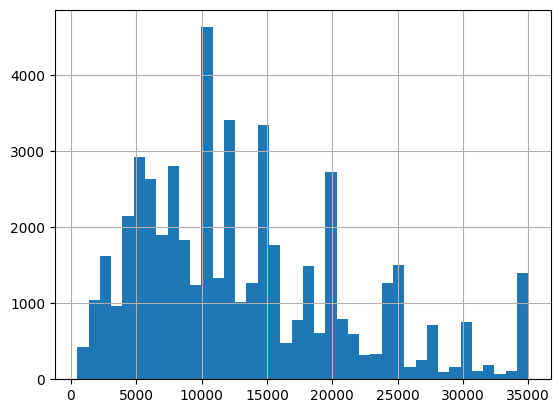

In [24]:
transf.K_2_Test(df_tran, "funded_amount")

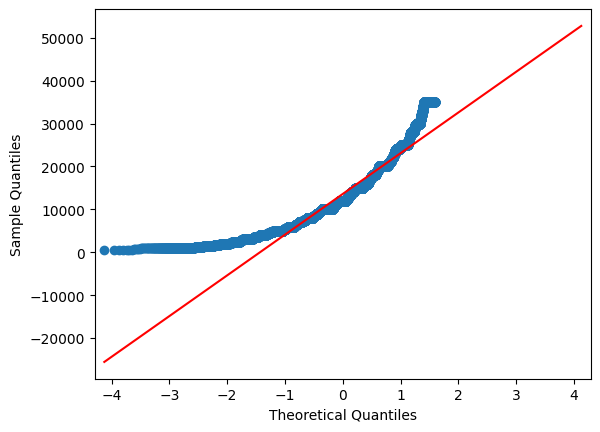

In [25]:
transf.q_q_plot(df_tran, "funded_amount")

In [26]:
get_info.desc_stats(df_tran, ["median", "st_dev", "mean"], ["term", "loan_amount",	"funded_amount", "funded_amount_inv", "int_rate",	"instalment", "collections_12_mths_ex_med"])

Table, Descriptive statistics for our continuous data coumns

| stat   |    term |   loan_amount |   funded_amount |   funded_amount_inv |   int_rate |   instalment |   collections_12_mths_ex_med |
|--------|---------|---------------|-----------------|---------------------|------------|--------------|------------------------------|
| median | 36      |      12000    |        20000    |             11300   |   19.52    |      347.15  |                   0          |
| st_dev | 10.7195 |       8082.12 |         8018.94 |              8099.4 |    4.39285 |      238.918 |                   0.0709895  |
| mean   | 42.6062 |      13333.1  |        13229.5  |             12952.6 |   13.5073  |      400.014 |                   0.00420819 |


#### Make copy of data frame

In [27]:
df_tran_new = df_tran.copy(deep=True)

In [28]:
df_tran_new["funded_amount"] = df_tran_new["funded_amount"].fillna(df_tran_new["funded_amount"].mean())

Statistics=5097.9, p=0.000


np.float64(0.0)

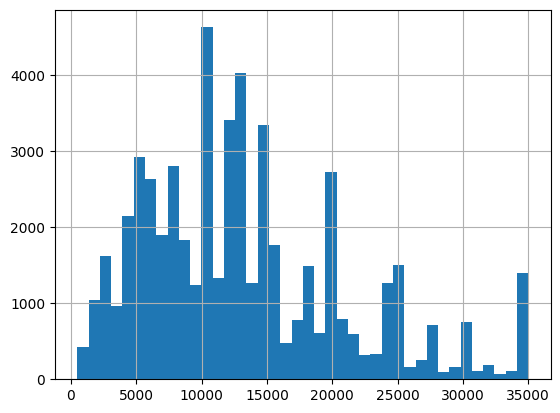

In [29]:
transf.K_2_Test(df_tran_new, "funded_amount")

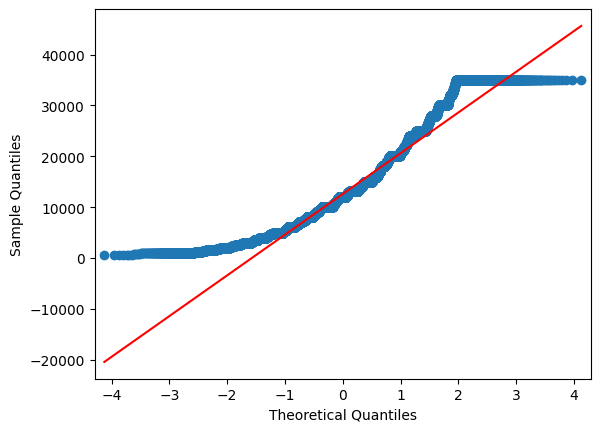

In [30]:
transf.q_q_plot(df_tran_new, "funded_amount")

#### Drop problematic column

In [31]:
transf.drop_col(df_tran, ["mths_since_last_record"])

#### Impute null values repaced by median or mean

In [32]:
# Impute null values with median
df_tran_new = transf.inpute_df_median_col(df_tran,["term", "employment_length", "collections_12_mths_ex_med"])
# Impute null values with mean
df_tran_new = transf.inpute_df_mean_col(df_tran_new, ["funded_amount", "int_rate"])


#### Impute null dates with a selected alternative

In [33]:
df_tran_new = transf.inpute_dates(df_tran_new)

### Visual check that all NULLs have been removed

In [34]:
my_plotter = Plotter()

init_Plotter


In [35]:

my_plotter.compare_null_val(df_tran, df_tran_new)


init_DataFrameInfo
| data_col                   |     %_NULL |   post %_NULL |
|----------------------------|------------|---------------|
| loan_amount                |  0         |             0 |
| funded_amount              |  5.5448    |             0 |
| funded_amount_inv          |  0         |             0 |
| term                       |  8.7994    |             0 |
| int_rate                   |  9.53145   |             0 |
| instalment                 |  0         |             0 |
| grade                      |  0         |             0 |
| sub_grade                  |  0         |             0 |
| employment_length          |  3.90552   |             0 |
| home_ownership             |  0         |             0 |
| annual_inc                 |  0         |             0 |
| verification_status        |  0         |             0 |
| issue_date                 |  0         |             0 |
| loan_status                |  0         |             0 |
| payment_plan       

In [36]:
get_info.save_as_csv(df_tran_new, "post_null_impute")

### Checking the skew in the continuous data columns

#### List of continuous data columns

In [37]:
# do I include dates?
continuous_lst = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'employment_length',  'annual_inc', 'issue_date', 'dti', 'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code']

In [38]:
print(list(df_tran_new.columns.values))

df_tran_new.info()

['loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code', 'application_type']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amount                 54231 non-null  int64   
 1   funded_amount               54231 non-null  float

In [39]:
#my_plotter.grid_hist_kde(df_tran_new, continuous_lst)

#### Modify continuous data 
Removing columns based of visual inspection of histogram KDE grid plot

In [40]:
rm_lst = ["issue_date", "earliest_credit_line", "last_payment_date", "next_payment_date", "term", "employment_length", "deling_2yrs", "inq_last_6mths", "out_prncp", "out_prncp_inv", "total_rec_late_fee", "recoveries", "collection_recovery_fee", 'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code']
continuous_lst = [col for col in continuous_lst if col not in rm_lst]
print({f'{continuous_lst}'})

{"['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']"}


In [41]:
#my_plotter.grid_hist_kde(df_tran_new, continuous_lst)

...
 loan_amount


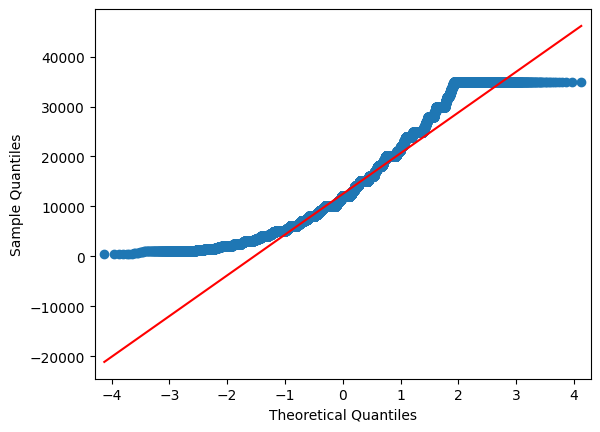


 count    54231.000000
mean     13333.076100
std       8082.196709
min        500.000000
25%       7000.000000
50%      12000.000000
75%      18000.000000
max      35000.000000
Name: loan_amount, dtype: float64

...
 funded_amount


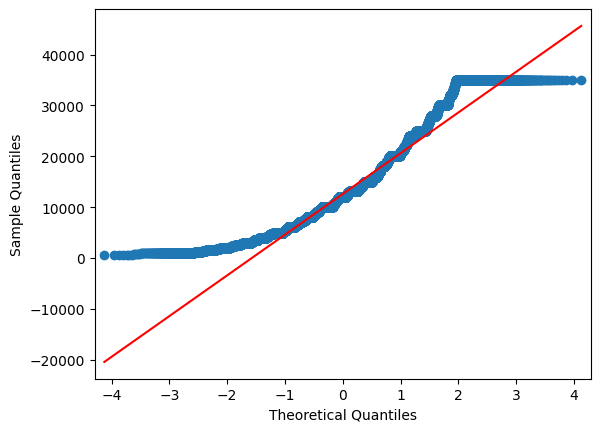


 count    54231.000000
mean     13229.509117
std       7793.523865
min        500.000000
25%       7200.000000
50%      12000.000000
75%      18000.000000
max      35000.000000
Name: funded_amount, dtype: float64

...
 funded_amount_inv


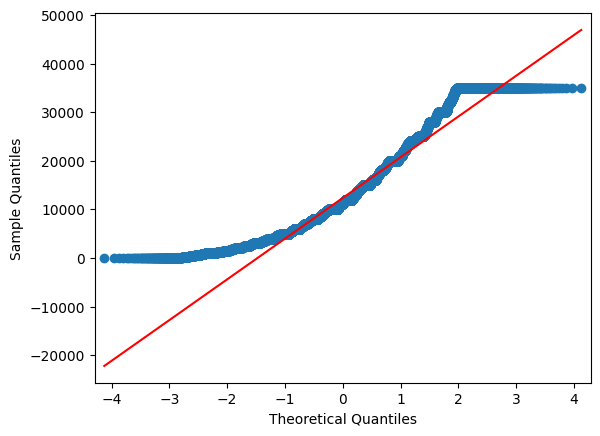


 count    54231.000000
mean     12952.622979
std       8099.473527
min          0.000000
25%       6700.000000
50%      11300.000000
75%      18000.000000
max      35000.000000
Name: funded_amount_inv, dtype: float64

...
 int_rate


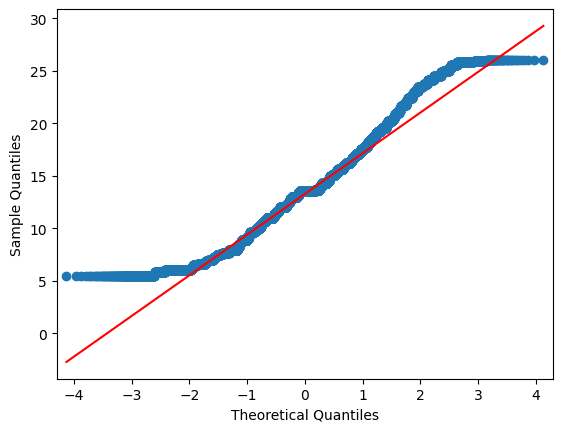


 count    54231.000000
mean        13.507328
std          4.178294
min          5.420000
25%         10.650000
50%         13.507328
75%         15.880000
max         26.060000
Name: int_rate, dtype: float64

...
 instalment


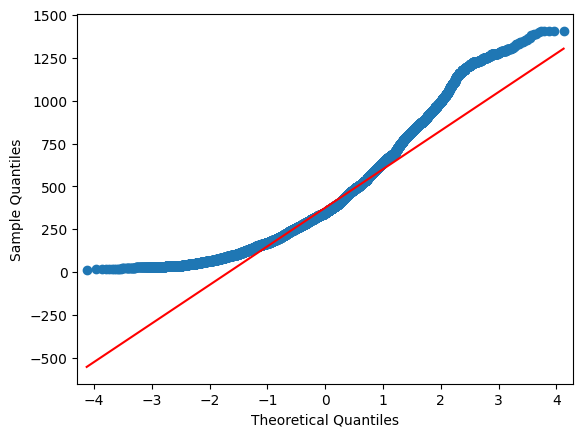


 count    54231.000000
mean       400.013953
std        238.920012
min         15.670000
25%        224.205000
50%        347.150000
75%        527.550000
max       1407.010000
Name: instalment, dtype: float64

...
 annual_inc


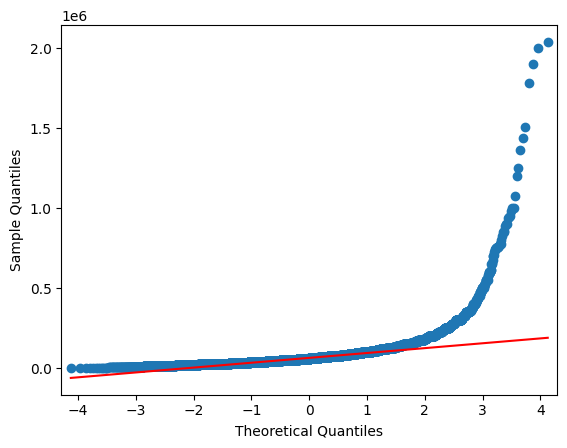


 count    5.423100e+04
mean     7.222085e+04
std      5.158934e+04
min      3.300000e+03
25%      4.500000e+04
50%      6.100000e+04
75%      8.600000e+04
max      2.039784e+06
Name: annual_inc, dtype: float64

...
 dti


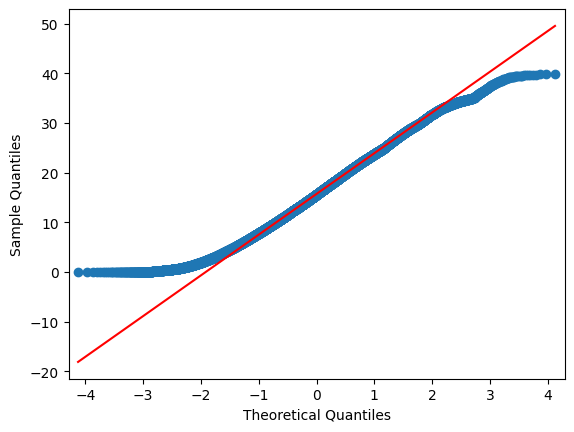


 count    54231.000000
mean        15.867087
std          7.623124
min          0.000000
25%         10.200000
50%         15.600000
75%         21.260000
max         39.910000
Name: dti, dtype: float64

...
 open_accounts


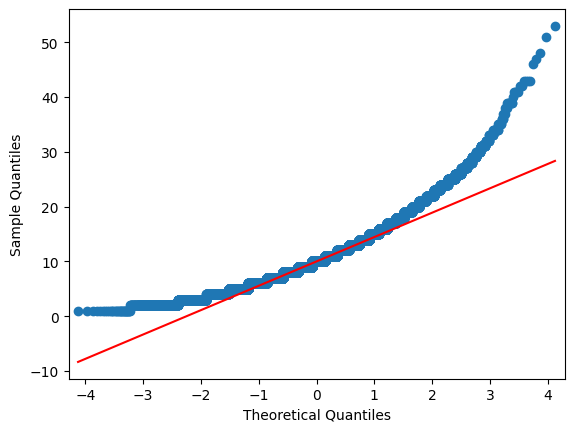


 count    54231.000000
mean        10.559809
std          4.797169
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         53.000000
Name: open_accounts, dtype: float64

...
 total_accounts


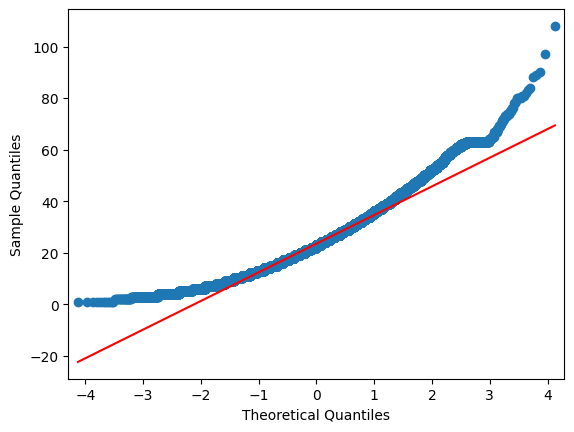


 count    54231.000000
mean        24.168206
std         11.587025
min          1.000000
25%         16.000000
50%         23.000000
75%         31.000000
max        108.000000
Name: total_accounts, dtype: float64

...
 total_payment


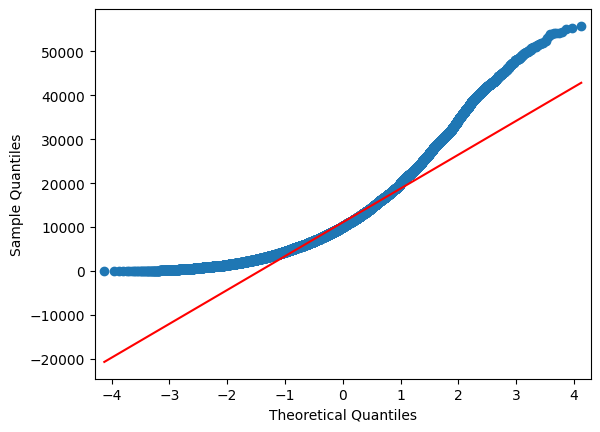


 count    54231.000000
mean     12079.208480
std       8391.043845
min          0.000000
25%       5895.210000
50%      10113.250000
75%      16272.895000
max      55758.222084
Name: total_payment, dtype: float64

...
 total_payment_inv


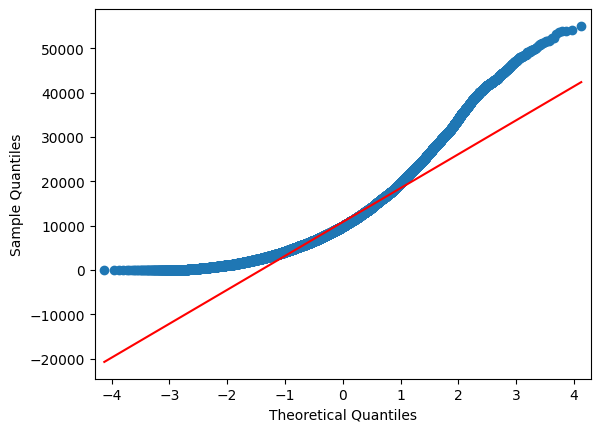


 count    54231.000000
mean     11788.946618
std       8363.508506
min          0.000000
25%       5658.815000
50%       9835.830000
75%      15978.200000
max      55061.000000
Name: total_payment_inv, dtype: float64

...
 total_rec_prncp


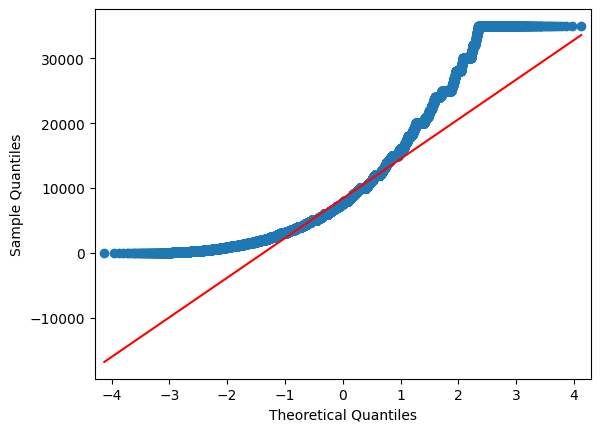


 count    54231.000000
mean      9407.048589
std       6958.124264
min          0.000000
25%       4264.350000
50%       7644.920000
75%      12505.625000
max      35000.020000
Name: total_rec_prncp, dtype: float64

...
 total_rec_int


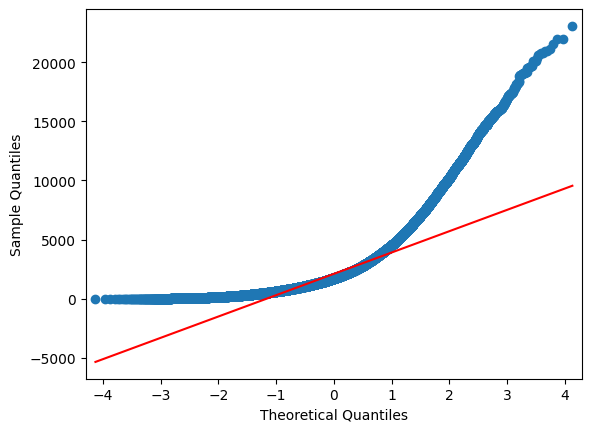


 count    54231.000000
mean      2577.757101
std       2581.657345
min          0.000000
25%        889.560000
50%       1734.640000
75%       3323.765000
max      23062.450000
Name: total_rec_int, dtype: float64

...
 last_payment_amount


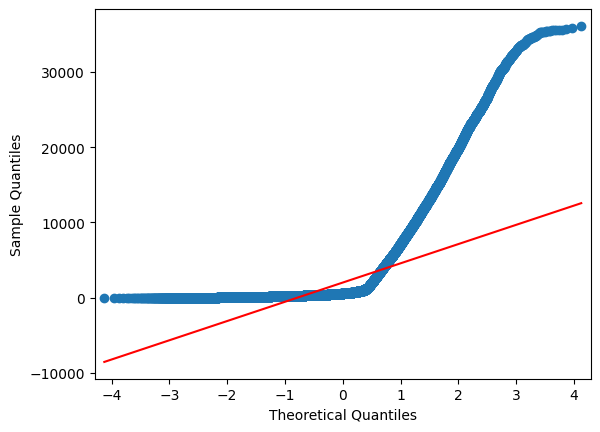


 count    54231.000000
mean      3130.706393
std       5323.801675
min          0.000000
25%        289.790000
50%        562.670000
75%       3738.120000
max      36115.200000
Name: last_payment_amount, dtype: float64



In [42]:
my_plotter.multi_q_q_plot(df_tran_new, continuous_lst)

#### Correcting skew
The columns "loan_amount", "funded_amount", "int_rate", "instalment", "annual_inc", "open_accounts", "total_accounts" are corrected with a Box-Cox transformation this Transformation produces a reduced magnitude of skew. 

The columns "funded_amount_inv", "dti", "total_payment_inv", "total_rec_prncp", "total_rec_int" are corretced using the Yeo-Johnson transformation because it gives an improved skew magnitude and there are negative values in the serires.

The columns "total_payment" is corrected using the Yeo-Johnson correction this gives a greater reduction in skew magnitude than Box-Cox transformation, even when ther are no negative values visual inspection is better also.

The column "last_payment_amount" apears to be biphasic, the skew does improve with a Yeo-Johnson correction so currently that will be apilled.

In [43]:
col_bc_lst = ["loan_amount", "funded_amount", "int_rate", "instalment", "annual_inc", "open_accounts", "total_accounts"]
col_yt_lst = ["funded_amount_inv", "dti", "total_payment_inv", "total_rec_prncp", "total_rec_int", "total_payment", "last_payment_amount"]
col_all_lst =  col_bc_lst + col_yt_lst

In [44]:
transf.multi_box_cox_transform(df_tran_new, col_bc_lst)

loan_amount
funded_amount
int_rate
instalment
annual_inc
open_accounts
total_accounts
   loan_amount  funded_amount  funded_amount_inv  term  int_rate  instalment  \
0    67.940502      78.512364             8000.0  36.0  3.336438   16.248288   
1    81.921761      95.620582            13200.0  36.0  3.162855   19.752465   
2    87.999865     103.113483            16000.0  36.0  3.336438   21.347193   
3    85.913604     100.538069            15000.0  36.0  5.265356   21.631018   
4    85.913604     100.538069            15000.0  36.0  2.809890   20.645917   

  grade sub_grade  employment_length home_ownership  annual_inc  \
0     A        A4                5.0       MORTGAGE    7.932933   
1     A        A3                9.0           RENT    7.976827   
2     A        A4                8.0       MORTGAGE    8.179710   
3     C        C4                1.0           RENT    7.884794   
4     A        A1               10.0       MORTGAGE    8.518579   

  verification_status issue_da

In [45]:
transf.multi_yeo_johnson_transform(df_tran_new, col_yt_lst)

funded_amount_inv
dti
total_payment_inv
total_rec_prncp
total_rec_int
total_payment
last_payment_amount
   loan_amount  funded_amount  funded_amount_inv  term  int_rate  instalment  \
0    67.940502      78.512364         119.794551  36.0  3.336438   16.248288   
1    81.921761      95.620582         150.204319  36.0  3.162855   19.752465   
2    87.999865     103.113483         163.807197  36.0  3.336438   21.347193   
3    85.913604     100.538069         159.113389  36.0  5.265356   21.631018   
4    85.913604     100.538069         159.113389  36.0  2.809890   20.645917   

  grade sub_grade  employment_length home_ownership  annual_inc  \
0     A        A4                5.0       MORTGAGE    7.932933   
1     A        A3                9.0           RENT    7.976827   
2     A        A4                8.0       MORTGAGE    8.179710   
3     C        C4                1.0           RENT    7.884794   
4     A        A1               10.0       MORTGAGE    8.518579   

  verificati

#### Representitive comparions of numerical transformations
Example used is the "instalment" column

...
 instalment



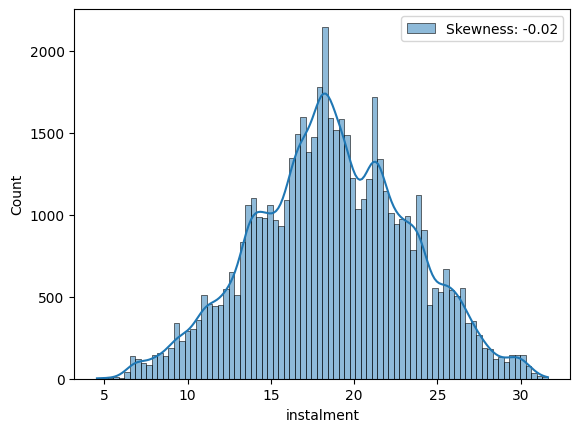

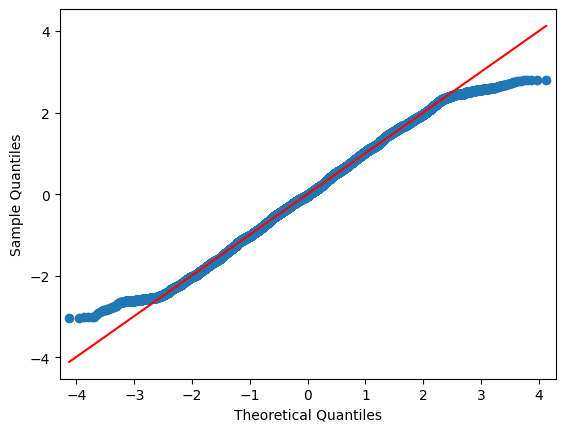

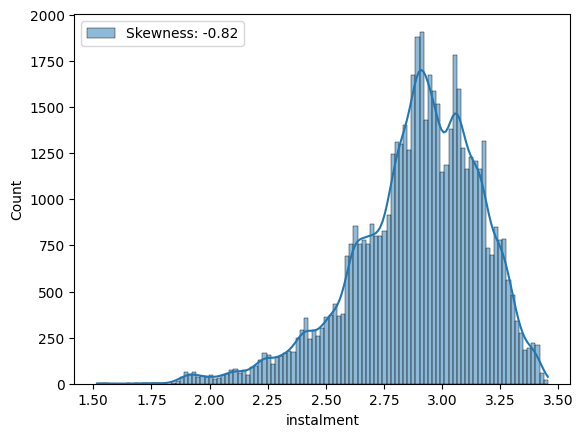

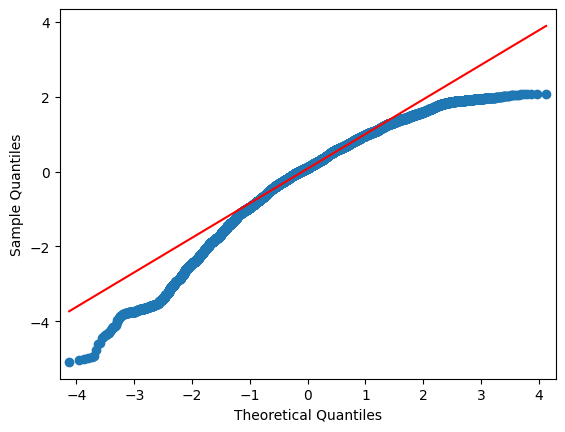

In [46]:
transf.log_transform(df_tran_new, "instalment")

...
 instalment



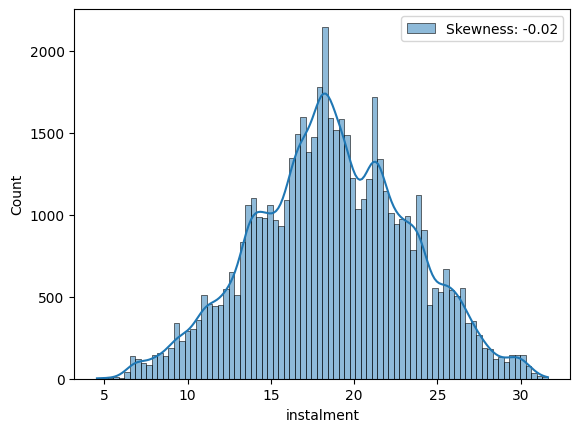

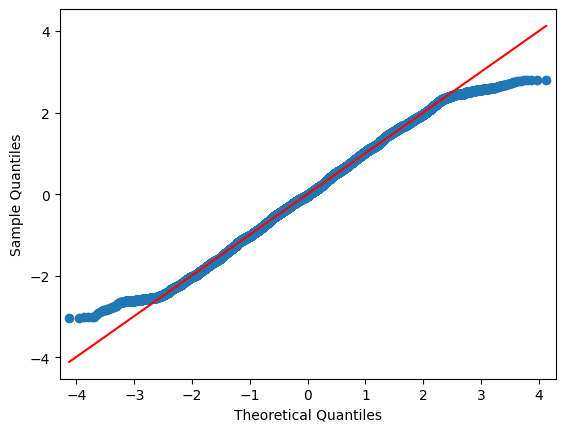

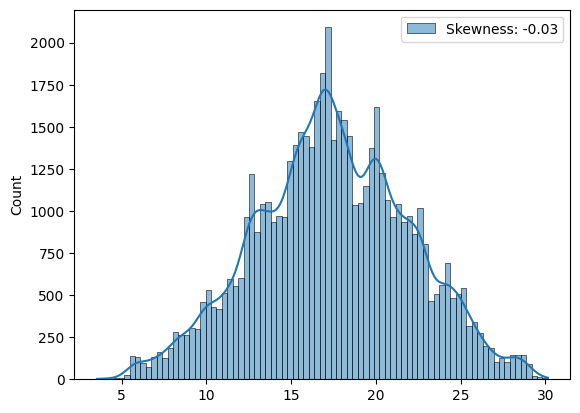

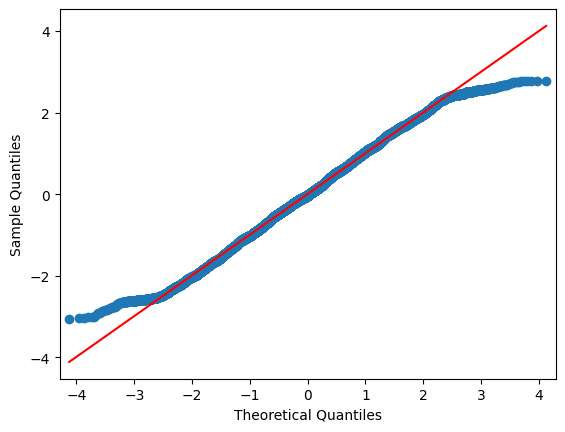

In [47]:
transf.box_cox_transform(df_tran_new, "instalment")

...
 instalment



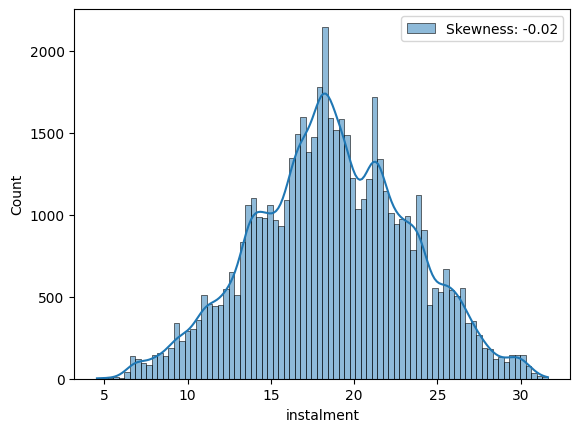

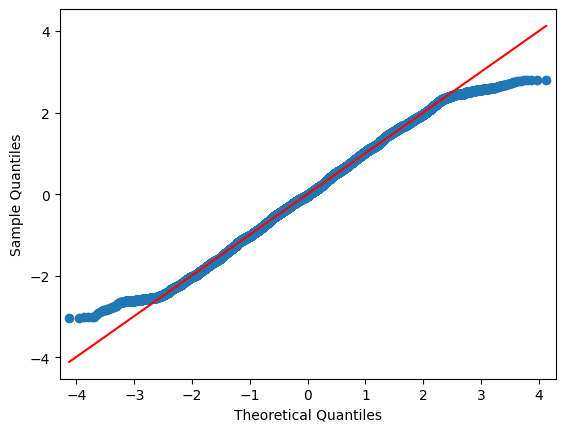

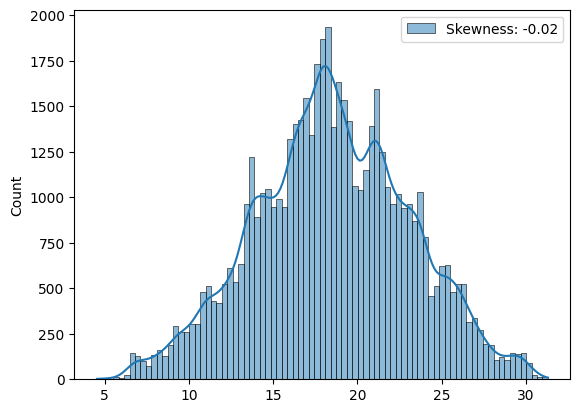

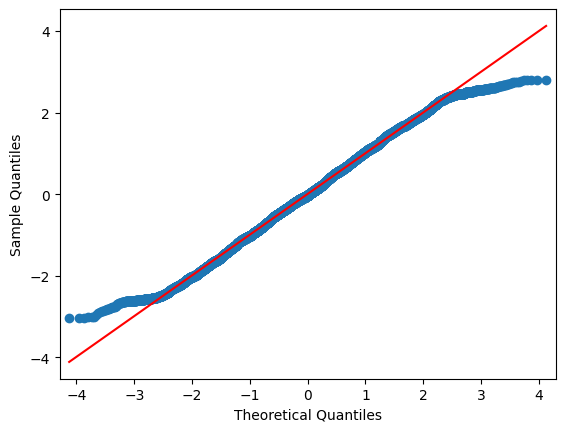

In [48]:
transf.yeo_johnson_transform(df_tran_new, "instalment")

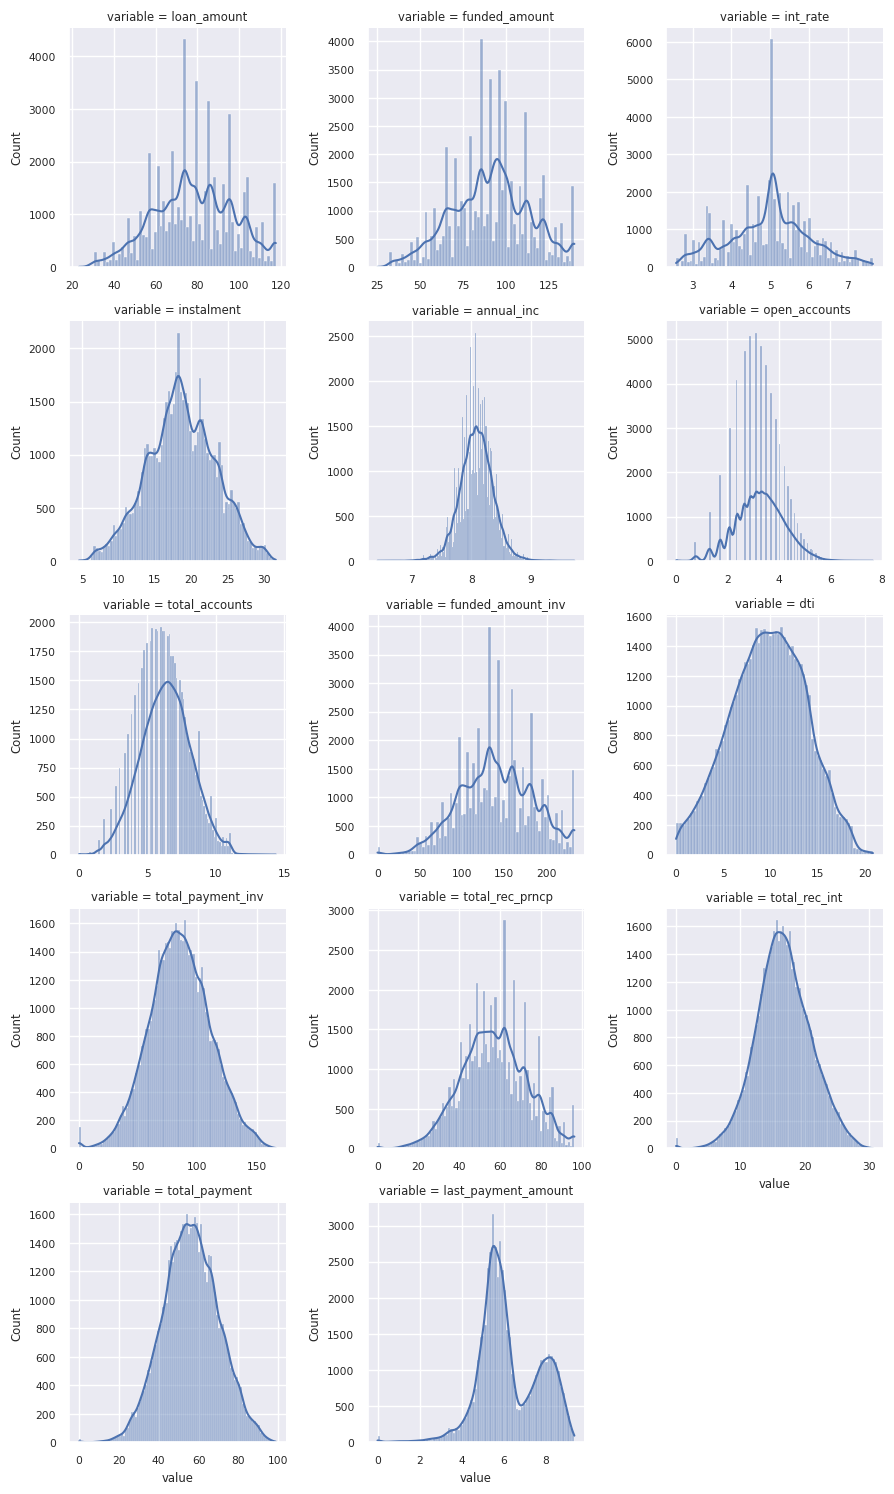

In [49]:
my_plotter.grid_hist_kde(df_tran_new, col_all_lst)
categorical_features = my_plotter.categ_feat(df_tran_new, col_all_lst)

### Removing outliers from the dataset

#### Visual inspection
Outliers will be removed using visual inspection and domain-specific knowledge.

Length of categorical_features = 24
Length of categorical_features = 19
['delinq_2yrs', 'recoveries', 'collections_12_mths_ex_med', 'collection_recovery_fee', 'out_prncp_inv', 'sub_grade', 'total_rec_late_fee', 'employment_length', 'purpose', 'home_ownership', 'loan_status', 'inq_last_6mths', 'policy_code', 'payment_plan', 'term', 'out_prncp', 'verification_status', 'application_type', 'grade']


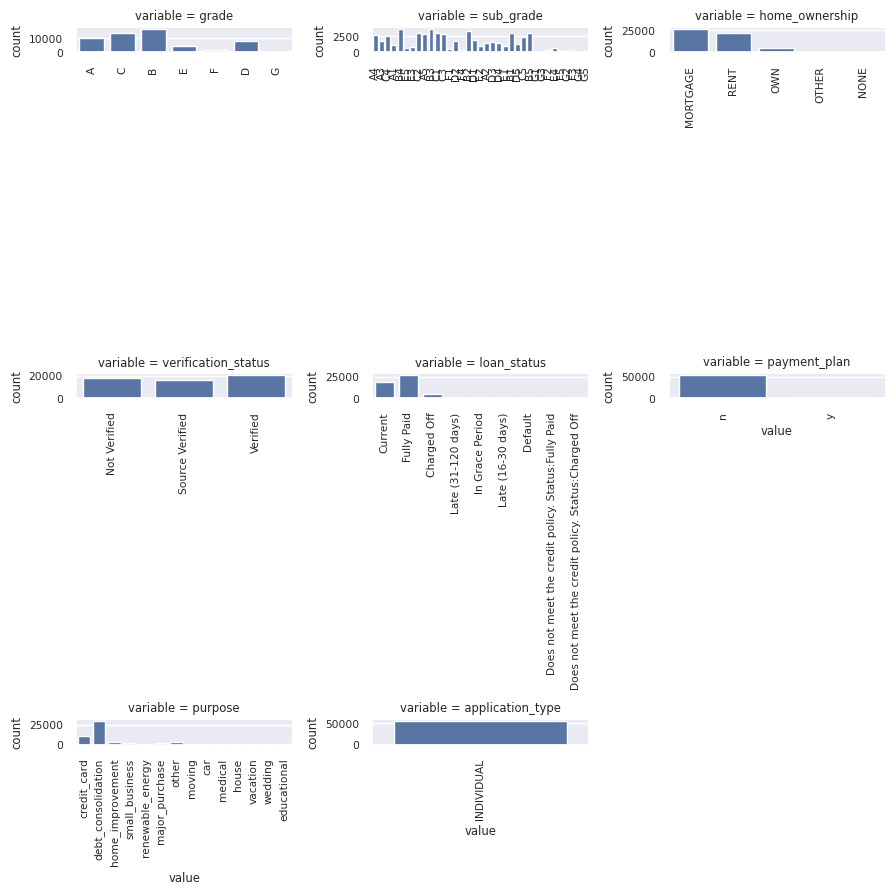

In [50]:
print(f'Length of categorical_features = {len(categorical_features)}')
date_lst = ["issue_date", "last_payment_date", "next_payment_date", "last_credit_pull_date", "earliest_credit_line"]
categorical_features = list(set(categorical_features) - set(date_lst))
print(f'Length of categorical_features = {len(categorical_features)}')
print(f'{categorical_features}')
my_plotter.count_categ_data(df_tran_new, [ "grade", "sub_grade","home_ownership", "verification_status", "loan_status", "payment_plan",	"purpose", "application_type"])

In [51]:
df_tran_new = transf.rm_zero_val_outlier(df_tran_new, ["total_payment_inv"])

In [52]:
df_tran_new = transf.rm_max_val_outlier(df_tran_new, ["total_rec_prncp", "funded_amount"])

total_rec_prncp max is 96.11644197763565
 df length = 54082
 df length = 54079
funded_amount max is 139.97419758543958
 df length = 54079
 df length = 52734


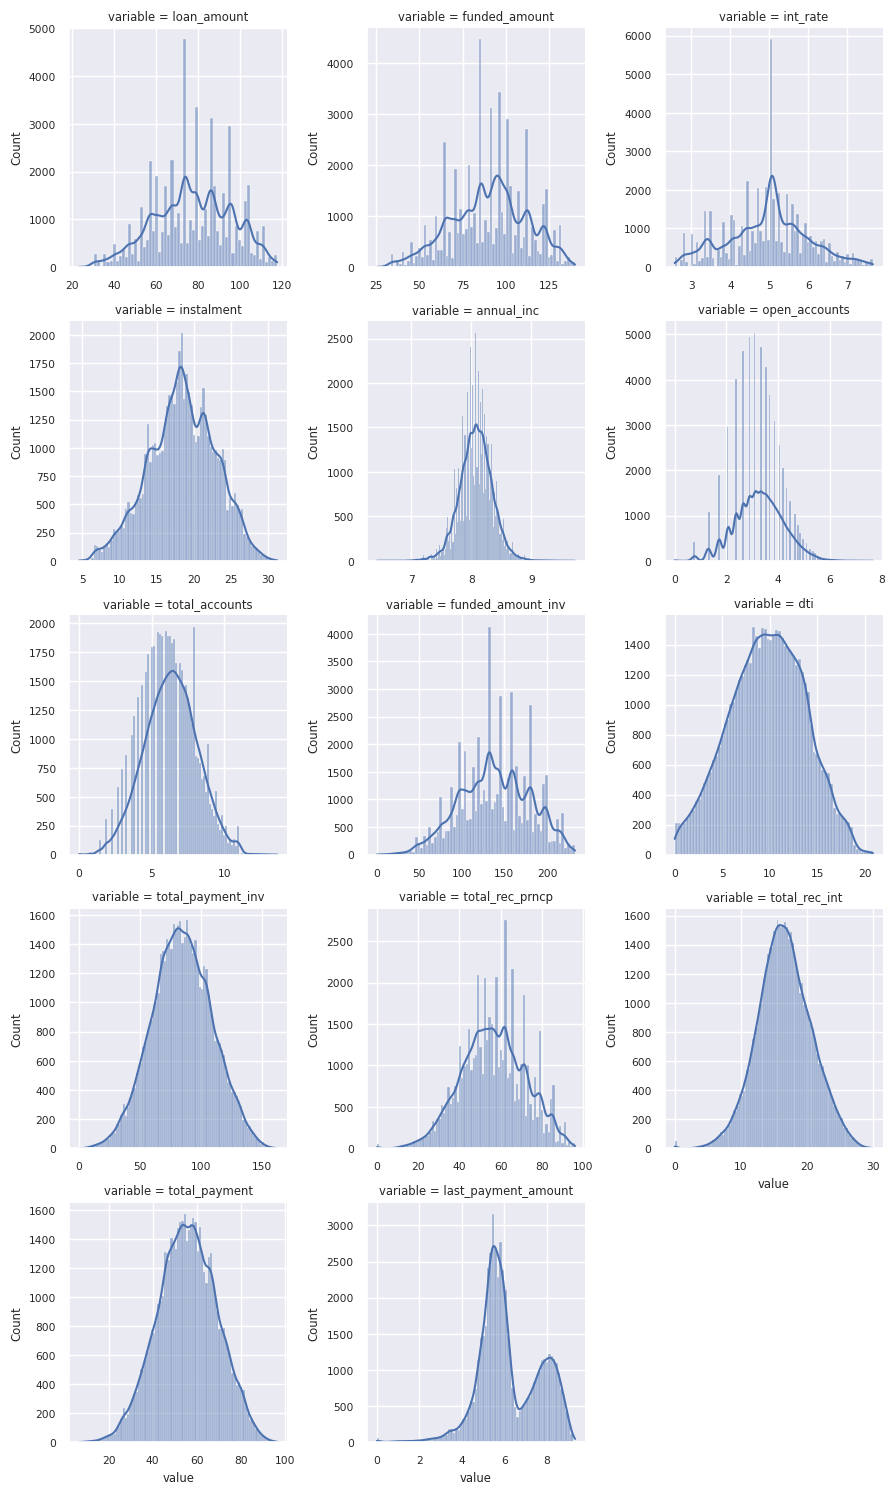

In [53]:
my_plotter.grid_hist_kde(df_tran_new, col_all_lst)

### Dropping of overly correlated columns

##### Create a copy of our df without catergorcal and date columns

In [54]:
temp_f = df_tran_new.copy()
transf.drop_col(temp_f, categorical_features)
transf.drop_col(temp_f, date_lst)

#### Correlation matrix
Present two visualizations of our continuous data

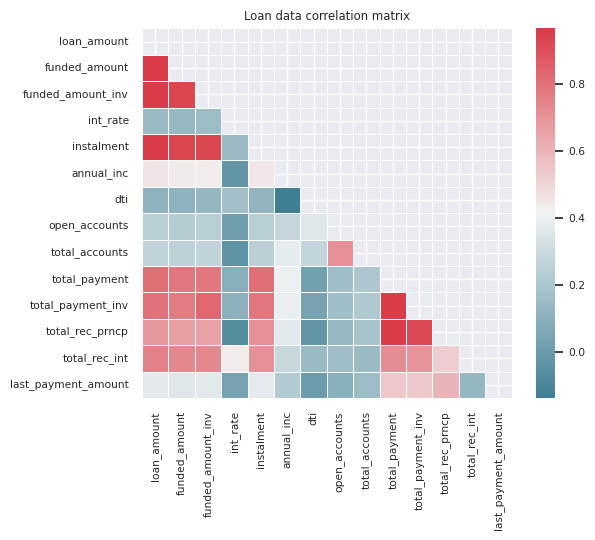

None


In [55]:
print(my_plotter.mat_hm_corr_plot(temp_f, "Loan data correlation matrix"))
px.imshow(temp_f.corr(), title="Loan data correlation matrix")

#### Remover over correlated columns
This is done using a cut off value in the out put of ```df.corr()``` one column at a time, retaining the column being probed.

In [56]:
corr_lst = transf.sel_corr_cols(temp_f, 0.95)

{'funded_amount', 'instalment', 'total_payment_inv', 'funded_amount_inv', 'total_rec_prncp'}


In [57]:
transf.drop_col(temp_f, corr_lst)

#### Revisualise continuous data

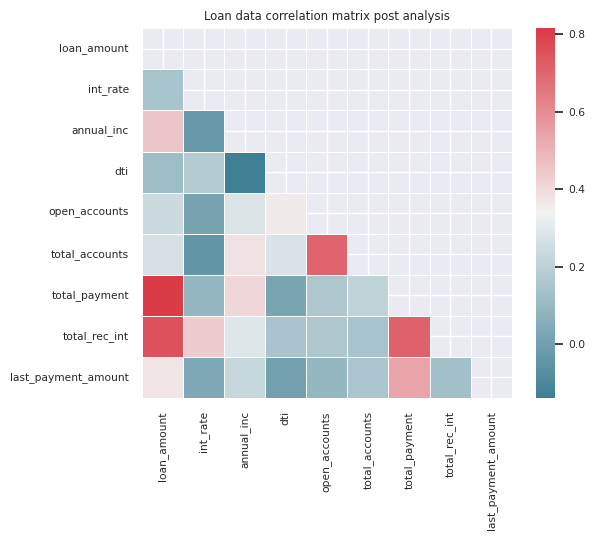

None


In [58]:
print(my_plotter.mat_hm_corr_plot(temp_f, "Loan data correlation matrix post analysis"))
px.imshow(temp_f.corr(), title="Loan data correlation matrix post analysis")